In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, ParameterGrid
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

1 - Load the dataset and plot it

In [4]:
df = pd.read_csv("2d-synthetic.csv")

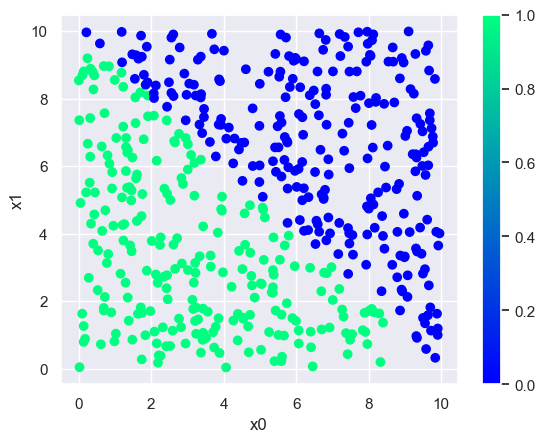

In [5]:
sns.set()
plt.scatter(df['x0'].to_numpy(), df['x1'].to_numpy(), c=df['label'].to_numpy(), cmap='winter')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.colorbar()

2 - Build a default decision tree

In [6]:
clf = DecisionTreeClassifier()
clf.fit(df.iloc[:, :-1:].to_numpy(), df.iloc[:, -1:].to_numpy())

DecisionTreeClassifier()

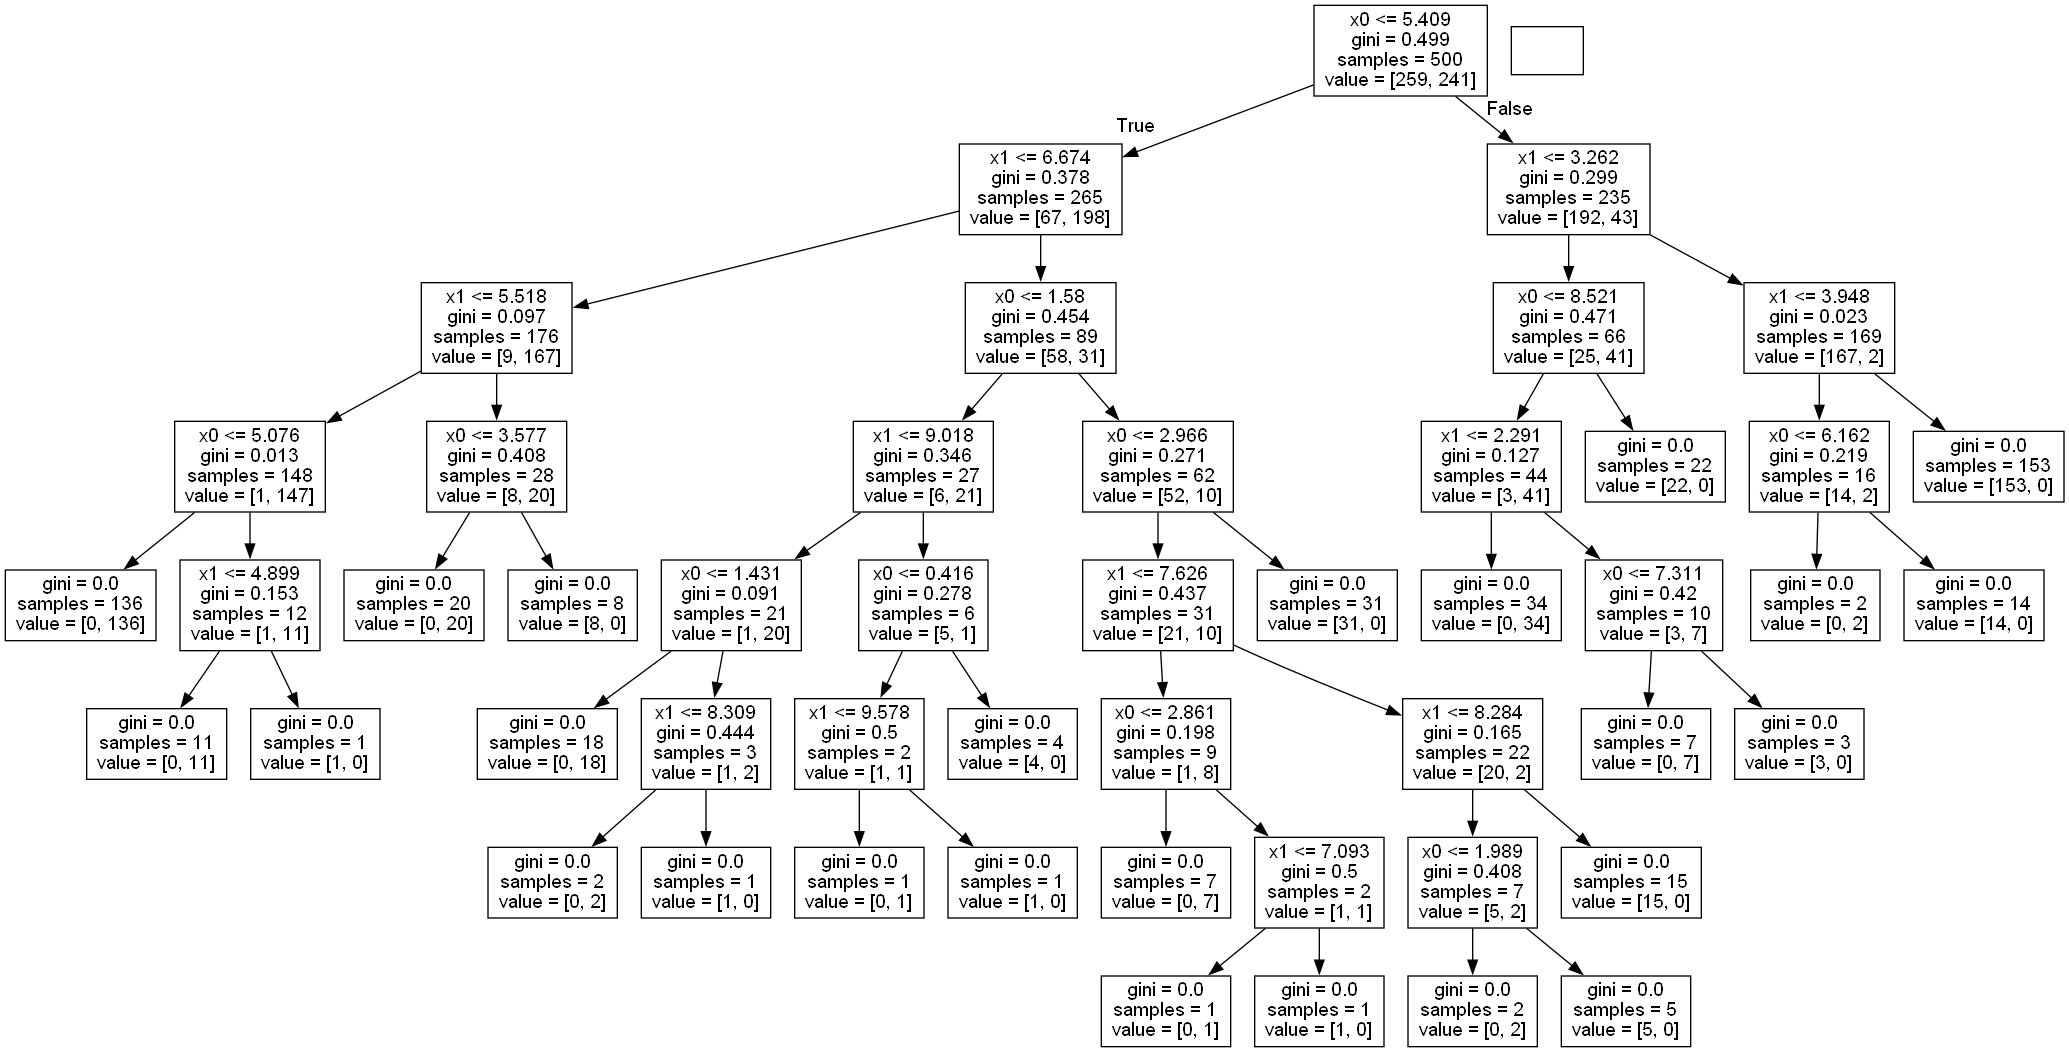

In [7]:
dot_code = export_graphviz(clf, feature_names=df.columns.to_numpy()[:-1])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

3 - Let's try a rototranslation for preprocessing

In [8]:
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array([[c, -s ], [s, c]])
T = np.array([5, 5])
pre_processed_df = pd.DataFrame(columns=df.columns.to_list())
for idx, row in df.iloc[:,:-1:].iterrows():
    new_row = row.to_numpy() - T
    new_row = np.dot(R, new_row.reshape(-1,1))
    new_row = new_row.flatten() + T
    pre_processed_df.loc[idx] = [new_row[0], new_row[1], df.iloc[idx, -1]]

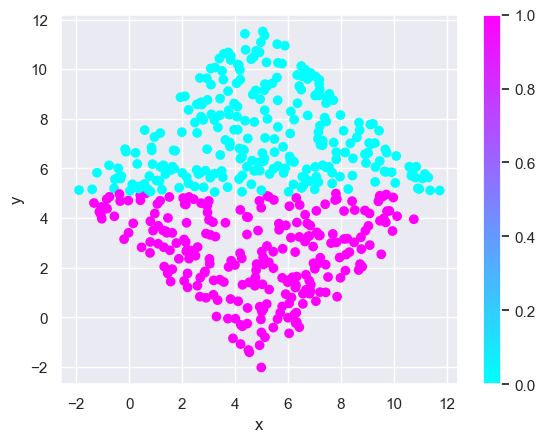

In [9]:
sns.set()
plt.scatter(pre_processed_df['x0'].to_numpy(), pre_processed_df['x1'].to_numpy(), c=pre_processed_df['label'].to_numpy(), cmap='cool')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

In [10]:
clf = DecisionTreeClassifier()
clf.fit(pre_processed_df.iloc[:, :-1:].to_numpy(), pre_processed_df.iloc[:, -1:].to_numpy())

DecisionTreeClassifier()

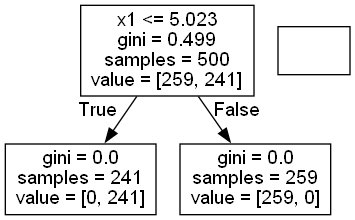

In [11]:
dot_code = export_graphviz(clf, feature_names=df.columns.to_numpy()[:-1])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())